In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
data = pd.read_csv('/content/new_predictions (1) (1).csv')

# Preview the dataset
data.head()

,Property_Number,specialNeeds,roofDamage,foundationDamage,householdComposition,destroyed,residenceType,repairAmount,grossIncome,waterLevel,tsa_eligible
0,1,0,0,0,2,0,Apartment,0.00,52000,0,0.0
1,2,0,1,0,4,0,House/Duplex,3698.52,30000,0,1.0
2,3,0,0,0,2,0,House/Duplex,0.00,3780,0,0.0
3,4,0,0,0,3,0,House/Duplex,0.00,18048,0,0.0
4,5,0,0,0,2,0,House/Duplex,0.00,0,0,0.0


In [ ]:
# Get an overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Property_Number       1048575 non-null  int64  
 1   specialNeeds          1048575 non-null  int64  
 2   roofDamage            1048575 non-null  int64  
 3   foundationDamage      1048575 non-null  int64  
 4   householdComposition  1048575 non-null  int64  
 5   destroyed             1048575 non-null  int64  
 6   residenceType         1048575 non-null  object 
 7   repairAmount          1048575 non-null  float64
 8   grossIncome           1048575 non-null  int64  
 9   waterLevel            1048575 non-null  int64  
 10  tsa_eligible          1048575 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 88.0+ MB


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Property_Number         0
specialNeeds            0
roofDamage              0
foundationDamage        0
householdComposition    0
destroyed               0
residenceType           0
repairAmount            0
grossIncome             0
waterLevel              0
tsa_eligible            0
dtype: int64


In [ ]:
# Display summary statistics for numerical columns
data.describe()

,Property_Number,specialNeeds,roofDamage,foundationDamage,householdComposition,destroyed,repairAmount,grossIncome,waterLevel,tsa_eligible
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,3.386882e-02,3.667072e-02,5.400663e-03,2.253349e+00,1.754762e-03,3.609742e+02,4.903923e+04,8.409766e-01,1.171132e-01
std,3.026977e+05,1.808916e-01,1.879522e-01,7.329052e-02,1.459048e+00,4.185313e-02,2.189897e+03,5.572152e+05,5.507423e+00,3.215553e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621445e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.876000e+03,0.000000e+00,0.000000e+00
50%,5.242880e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,0.000000e+00,0.000000e+00
75%,7.864315e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,4.000000e+04,0.000000e+00,0.000000e+00
max,1.048575e+06,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01,1.000000e+00,4.635872e+04,9.950000e+07,3.600000e+02,1.000000e+00


In [ ]:
# Count TSA-eligible vs. non-eligible families
tsa_counts = data['tsa_eligible'].value_counts()
print("TSA Eligibility Counts:\n", tsa_counts)

TSA Eligibility Counts:
 tsa_eligible
0.0    925773
1.0    122802
Name: count, dtype: int64


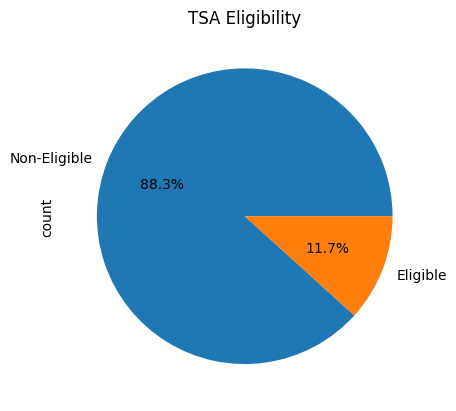

In [ ]:
import matplotlib.pyplot as plt

# TSA eligibility counts
tsa_counts = data['tsa_eligible'].value_counts()

# Pie chart
tsa_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Non-Eligible', 'Eligible'],
    title="TSA Eligibility"
)
plt.show()

In [ ]:
# Average water level for TSA-eligible vs. non-eligible families
water_level_analysis = data.groupby('tsa_eligible')['waterLevel'].mean()
print("\nAverage Water Level by TSA Eligibility:")
print(water_level_analysis)


Average Water Level by TSA Eligibility:
tsa_eligible
0.0    0.164329
1.0    5.942053
Name: waterLevel, dtype: float64


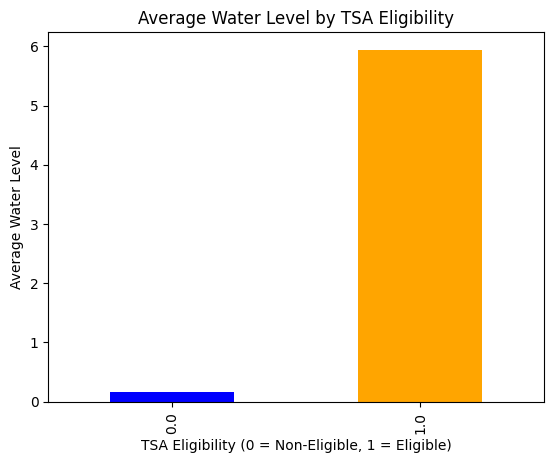

In [ ]:
# Bar chart for average water level
water_level_analysis = data.groupby('tsa_eligible')['waterLevel'].mean()
water_level_analysis.plot.bar(
    color=['blue', 'orange'],
    title="Average Water Level by TSA Eligibility"
)
plt.xlabel('TSA Eligibility (0 = Non-Eligible, 1 = Eligible)')
plt.ylabel('Average Water Level')
plt.show()

In [ ]:
# Average repair amount for TSA-eligible vs. non-eligible families
repair_amount_analysis = data.groupby('tsa_eligible')['repairAmount'].mean()
print("\nAverage Repair Amount by TSA Eligibility:")
print(repair_amount_analysis)


Average Repair Amount by TSA Eligibility:
tsa_eligible
0.0     143.594574
1.0    1999.744042
Name: repairAmount, dtype: float64


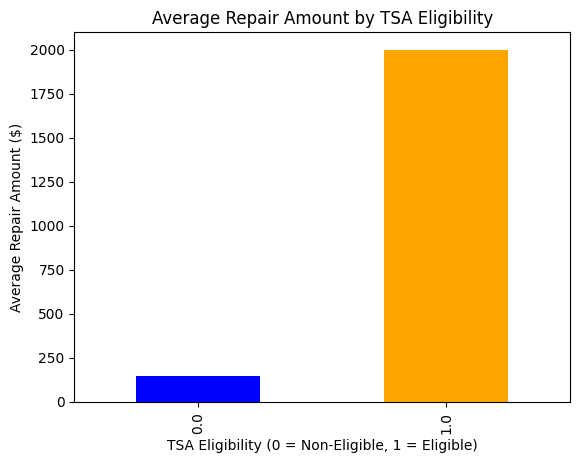

In [ ]:
# Bar chart for repair amount
repair_amount_analysis = data.groupby('tsa_eligible')['repairAmount'].mean()
repair_amount_analysis.plot.bar(
    color=['blue', 'orange'],
    title="Average Repair Amount by TSA Eligibility"
)
plt.xlabel('TSA Eligibility (0 = Non-Eligible, 1 = Eligible)')
plt.ylabel('Average Repair Amount ($)')
plt.show()

In [ ]:
# Average gross income for TSA-eligible vs. non-eligible families
income_analysis = data.groupby('tsa_eligible')['grossIncome'].mean()
print("\nAverage Gross Income by TSA Eligibility:")
print(income_analysis)


Average Gross Income by TSA Eligibility:
tsa_eligible
0.0    47156.511984
1.0    63232.550577
Name: grossIncome, dtype: float64


In [ ]:
# Count of residence types by TSA eligibility
residence_tsa = data.groupby(['residenceType', 'tsa_eligible']).size().unstack(fill_value=0)
print("\nResidence Type by TSA Eligibility:")
print(residence_tsa)


Residence Type by TSA Eligibility:
tsa_eligible                 0.0    1.0
residenceType                          
Apartment                 197921   4516
Assisted Living Facility    1370     29
Boat                         679     44
College Dorm                 351      2
Condo                      19772   9753
Correctional Facility        101      1
House/Duplex              587662  58439
Military Housing             518      1
Mobile Home                74152   1183
Other                      26736  14871
Townhouse                  10692  33228
Travel Trailer              5768    735
Unknown                       51      0


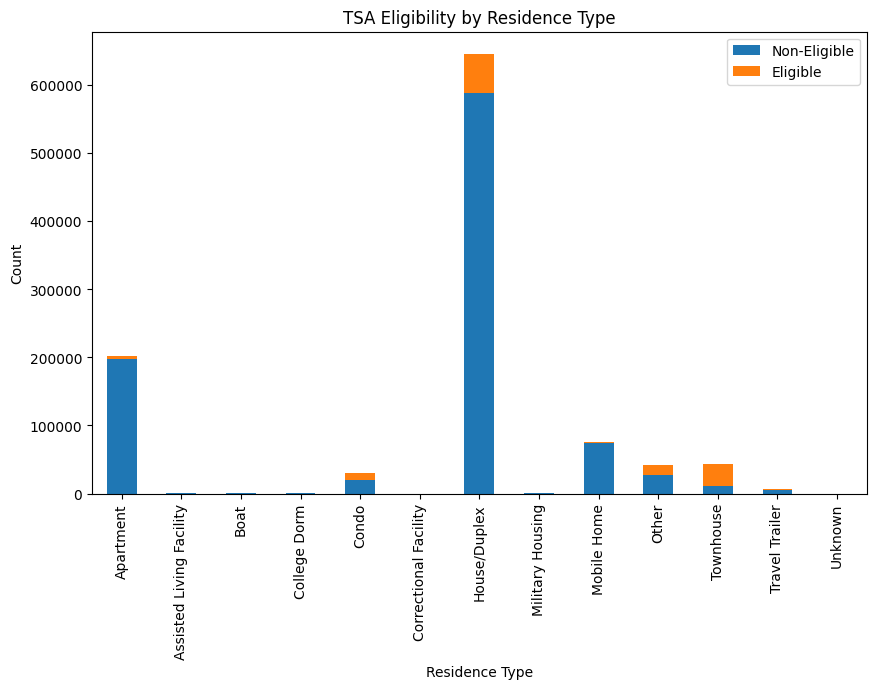

In [ ]:
# Stacked bar chart for residence type
residence_tsa.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    title="TSA Eligibility by Residence Type"
)
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(['Non-Eligible', 'Eligible'])
plt.show()

In [ ]:
# Count of special needs households by TSA eligibility
special_needs_tsa = data.groupby('tsa_eligible')['specialNeeds'].sum()
print("\nSpecial Needs by TSA Eligibility:")
print(special_needs_tsa)


Special Needs by TSA Eligibility:
tsa_eligible
0.0    31769
1.0     3745
Name: specialNeeds, dtype: int64


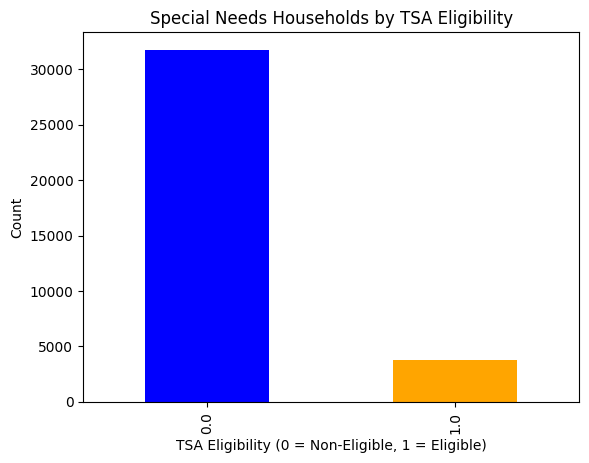

In [ ]:
# Bar chart for special needs
special_needs_tsa.plot.bar(
    color=['blue', 'orange'],
    title="Special Needs Households by TSA Eligibility"
)
plt.xlabel('TSA Eligibility (0 = Non-Eligible, 1 = Eligible)')
plt.ylabel('Count')
plt.show()